In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    RandomForestClassifier
)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# metric
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.rcParams["font.size"]= 10
%matplotlib inline

In [2]:
# load data into dataframe
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
classification = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris_dataset = pd.read_csv(url, names=classification)
iris_dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Checking Null Values in DataSet
iris_dataset.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [4]:
iris_dataset.describe().style.background_gradient(cmap='coolwarm').format(precision=2)

,sepal-length,sepal-width,petal-length,petal-width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


### Preprocessing

In [5]:
# Creating a LabelEncoder
label_encoder = LabelEncoder()
# Fit the encoder on the 'class' column and transform the values
iris_dataset['class_encoded'] = label_encoder.fit_transform(iris_dataset['class'])
iris_dataset.drop('class', axis=1)

,sepal-length,sepal-width,petal-length,petal-width,class_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
# relationship between data
iris_dataset.corr().style.background_gradient(cmap='coolwarm').format(precision=2)

<ipython-input-6-46ad9372eddf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_dataset.corr().style.background_gradient(cmap='coolwarm').format(precision=2)


,sepal-length,sepal-width,petal-length,petal-width,class_encoded
sepal-length,1.00,-0.11,0.87,0.82,0.78
sepal-width,-0.11,1.00,-0.42,-0.36,-0.42
petal-length,0.87,-0.42,1.00,0.96,0.95
petal-width,0.82,-0.36,0.96,1.00,0.96
class_encoded,0.78,-0.42,0.95,0.96,1.00


In [7]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal-length   150 non-null    float64
 1   sepal-width    150 non-null    float64
 2   petal-length   150 non-null    float64
 3   petal-width    150 non-null    float64
 4   class          150 non-null    object 
 5   class_encoded  150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


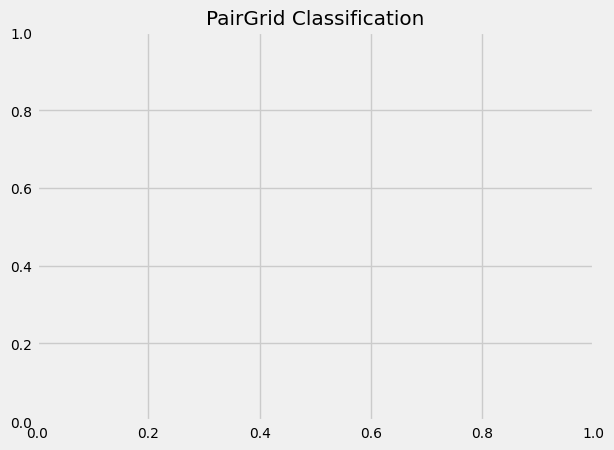

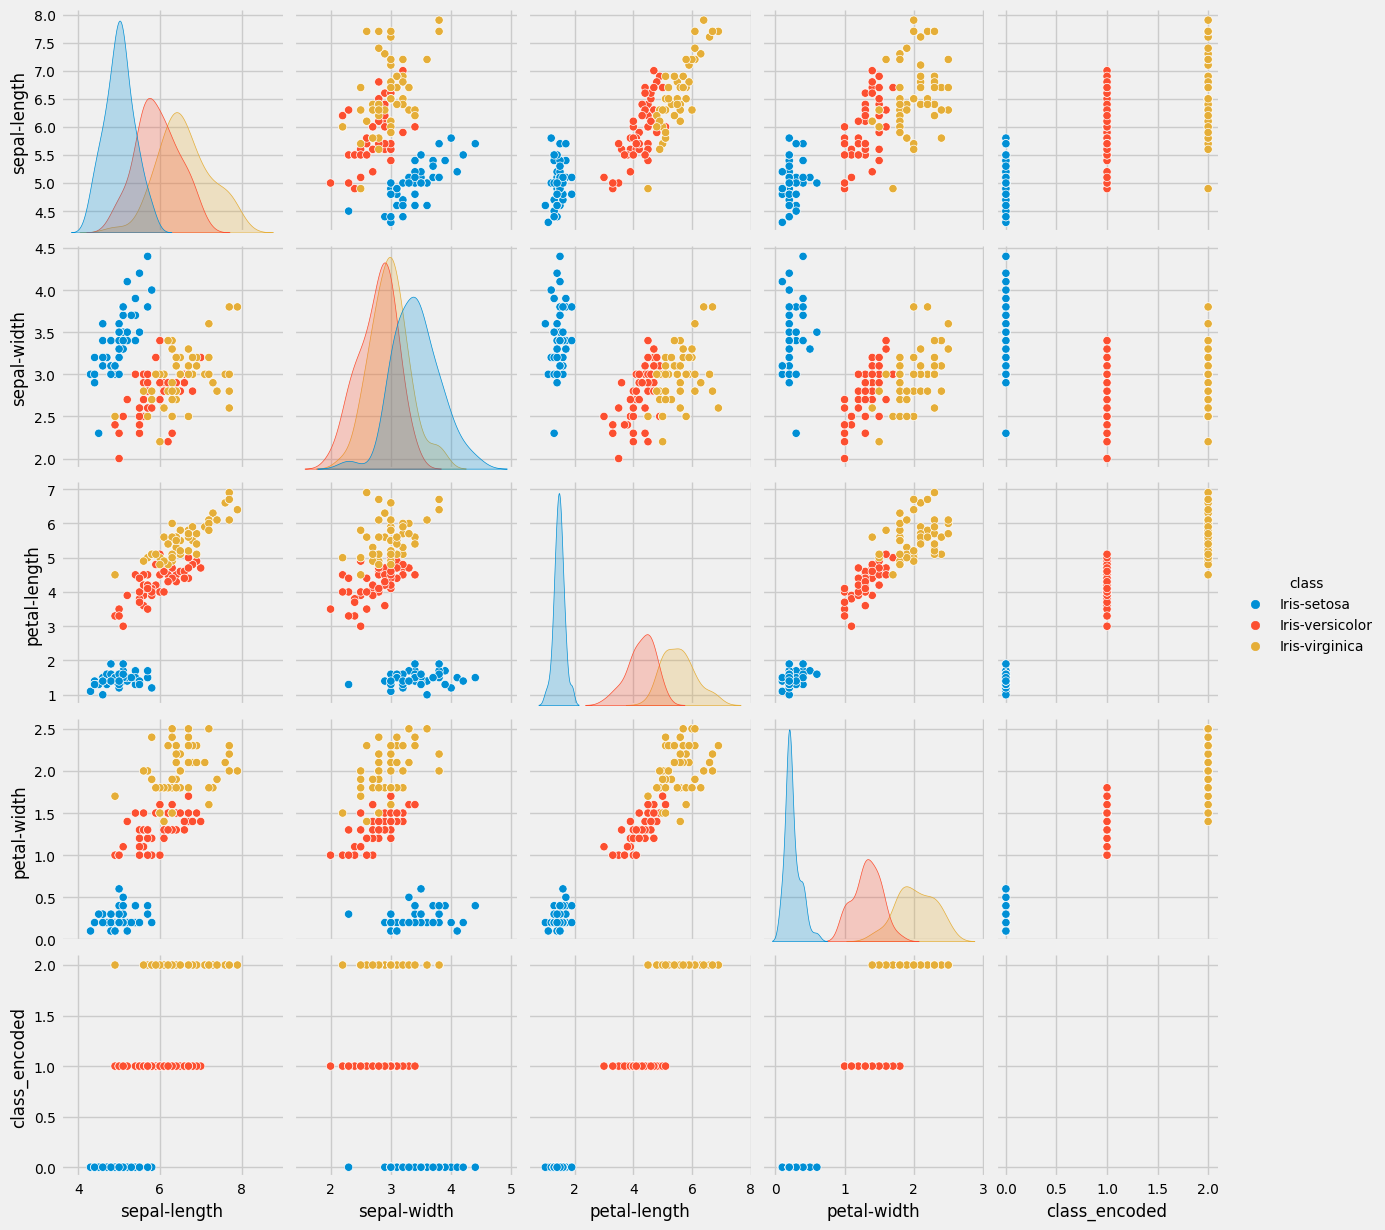

In [8]:
# Visualize the whole dataset using dataframe according to classification class
plt.title("PairGrid Classification")
sns.pairplot(iris_dataset, hue='class')
plt.show()

In [9]:
# Separate features and target
data = iris_dataset.values
X = data[:,0:4]
# set column 'class' as target
Y = data[:,4]
print(f"X_data shape: {X.shape} \nY_data shape: {Y.shape}")

X_data shape: (150, 4) 
Y_data shape: (150,)


In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, shuffle=True,
                                                                    random_state=42)
print(f"Shape of X_train: {X_train.shape} and y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape} and y_test: {y_test.shape}")

Shape of X_train: (120, 4) and y_train: (120,)
Shape of X_test: (30, 4) and y_test: (30,)


In [11]:
models = {
            "Random Forest": RandomForestClassifier(),
            "Decision Tree": DecisionTreeClassifier(),
            "Gradient Boosting": GradientBoostingClassifier(),
            "Logistic Regression": LogisticRegression(),
            "K-Neighbors Classifier": KNeighborsClassifier(),
            "AdaBoost Classifier": AdaBoostClassifier(),
            "Hist Gradient Boosting Classifier": HistGradientBoostingClassifier()
            }
params_grid = {
"Random Forest": {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
},
"Decision Tree": {
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
},
"Gradient Boosting": {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
},
"Logistic Regression": {
    "C": [0.01, 0.1, 1, 10],  # Different values of C
    "penalty": ["l1", "l2", "none"]
},
"K-Neighbors Classifier": {
    "n_neighbors": [3],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"]
},
"AdaBoost Classifier": {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1]
},
"Hist Gradient Boosting Classifier": {
    "learning_rate": [0.01, 0.1, 0.2],
    "max_iter": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "min_samples_leaf": [1, 2, 4]
}
}
models

{'Random Forest': RandomForestClassifier(),
 'Decision Tree': DecisionTreeClassifier(),
 'Gradient Boosting': GradientBoostingClassifier(),
 'Logistic Regression': LogisticRegression(),
 'K-Neighbors Classifier': KNeighborsClassifier(),
 'AdaBoost Classifier': AdaBoostClassifier(),
 'Hist Gradient Boosting Classifier': HistGradientBoostingClassifier()}

In [12]:
report = {}
for key in models.keys():
    print(f"{'*'*9} Training with {key} {'*'*3}")
    estimator = models[key]
    param = params_grid.get(key, 0)
    if param != 0:
        model = GridSearchCV(estimator, param, cv=5)
    else:
        print(f"Trainng with default parameter: {estimator}")
        model = estimator
    # fitting training data in the model
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_model_score = accuracy_score(y_train, y_train_pred)
    test_model_score = accuracy_score(y_test, y_test_pred)

    score = {"train_accuracy": train_model_score,
              "test_accuracy": test_model_score,
              "model": model}
    report[key] = score

********* Training with Random Forest ***
********* Training with Decision Tree ***
********* Training with Gradient Boosting ***
********* Training with Logistic Regression ***


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

********* Training with K-Neighbors Classifier ***
********* Training with AdaBoost Classifier ***
********* Training with Hist Gradient Boosting Classifier ***


In [13]:
report_df = pd.DataFrame.from_dict(report)
report_df

,Random Forest,Decision Tree,Gradient Boosting,Logistic Regression,K-Neighbors Classifier,AdaBoost Classifier,Hist Gradient Boosting Classifier
train_accuracy,0.958333,0.966667,0.975,0.983333,0.95,0.95,0.983333
test_accuracy,1.0,1.0,1.0,1.0,1.0,1.0,1.0
model,"GridSearchCV(cv=5, estimator=RandomForestClass...","GridSearchCV(cv=5, estimator=DecisionTreeClass...","GridSearchCV(cv=5, estimator=GradientBoostingC...","GridSearchCV(cv=5, estimator=LogisticRegressio...","GridSearchCV(cv=5, estimator=KNeighborsClassif...","GridSearchCV(cv=5, estimator=AdaBoostClassifie...","GridSearchCV(cv=5, estimator=HistGradientBoost..."


In [16]:
# best model is
report_df['Logistic Regression']

train_accuracy                                             0.983333
test_accuracy                                                   1.0
model             GridSearchCV(cv=5, estimator=LogisticRegressio...
Name: Logistic Regression, dtype: object